In [114]:
import pandas as pd
import numpy as np

# Scipy
import scipy

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import svm


# Metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, NMF
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Model summaries n shit
import statsmodels.api as sm

# Datetime
from datetime import datetime as dt

## Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [115]:
data=pd.read_csv('C:/Users/faeze/OneDrive/Desktop/Ironhack/Tech_challenge/technical_challenge_DA/data/measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [116]:
dataxl=pd.read_excel('C:/Users/faeze/OneDrive/Desktop/Ironhack/Tech_challenge/technical_challenge_DA/data/measurements2.xlsx')
dataxl

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [118]:
dataxl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [119]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [120]:
data['distance']=data['distance'].str.replace(',','.')
data['distance']=data['distance'].astype('float')

In [121]:
data['consume']=data['consume'].str.replace(',','.')
data['consume']=data['consume'].astype('float')

In [122]:
data['temp_inside']=data['temp_inside'].str.replace(',','.')
data['temp_inside']=data['temp_inside'].astype('float')

In [123]:
data.drop(columns='specials',inplace=True)

In [124]:
data.drop(columns=['refill liters', 'refill gas'],inplace=True)

In [125]:
g_type=pd.get_dummies(data['gas_type'])

In [126]:
data_clean=pd.concat((data, g_type), axis=1)
data_clean.drop(columns='gas_type', inplace=True)
data_clean.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0


In [127]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(data_clean[['temp_inside']])
data_clean['temp_inside'] = imputer.transform(data_clean[['temp_inside']])
data_clean

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,0,1


In [128]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   AC            388 non-null    int64  
 6   rain          388 non-null    int64  
 7   sun           388 non-null    int64  
 8   E10           388 non-null    uint8  
 9   SP98          388 non-null    uint8  
dtypes: float64(3), int64(5), uint8(2)
memory usage: 25.1 KB


In [129]:
data_clean.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.053411,-0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.015327,-0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,0.097360,-0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.010198,0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.148705,0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.105285,0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,-0.060328,0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.022761,0.022761
E10,0.053411,0.015327,0.097360,-0.010198,-0.148705,-0.105285,-0.060328,-0.022761,1.000000,-1.000000
SP98,-0.053411,-0.015327,-0.097360,0.010198,0.148705,0.105285,0.060328,0.022761,-1.000000,1.000000


<AxesSubplot:>

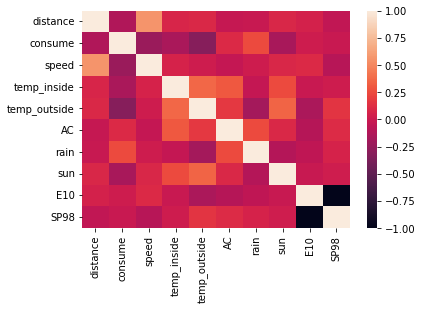

In [130]:
sns.heatmap(data_clean.corr())

<AxesSubplot:>

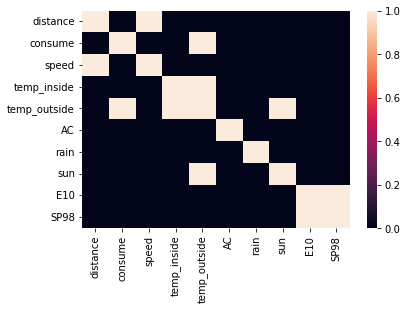

In [131]:
sns.heatmap(abs(data_clean.corr())>.3)

In [132]:
data_clean.groupby('E10').mean()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,SP98
E10,,,,,,,,,
0,18.639912,4.899123,40.820175,21.938007,12.22807,0.100877,0.140351,0.087719,1.0
1,21.096250,4.931250,43.506250,21.917429,10.11875,0.043750,0.100000,0.075000,0.0


In [133]:
data_clean.head(2)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0


<AxesSubplot:xlabel='distance', ylabel='consume'>

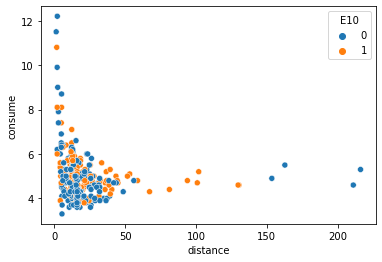

In [134]:
sns.scatterplot(x=data_clean['distance'],y=data_clean['consume'],hue=data_clean['E10'])

[(2.0, 8.0), (0.0, 50.0)]

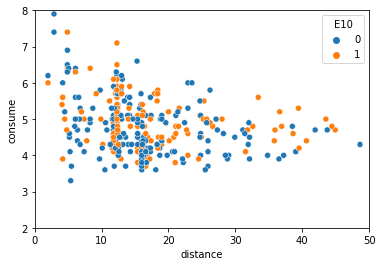

In [135]:
sns.scatterplot(x=data_clean['distance'],y=data_clean['consume'],hue=data_clean['E10']).set(ylim=(2, 8),xlim=(0,50))

<AxesSubplot:xlabel='speed', ylabel='consume'>

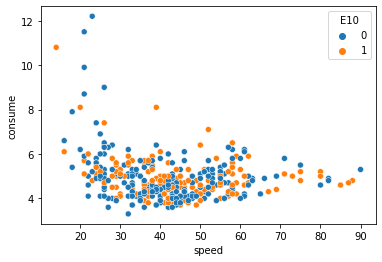

In [136]:
sns.scatterplot(x=data_clean['speed'],y=data_clean['consume'],hue=data_clean['E10'])

<AxesSubplot:xlabel='temp_outside', ylabel='AC'>

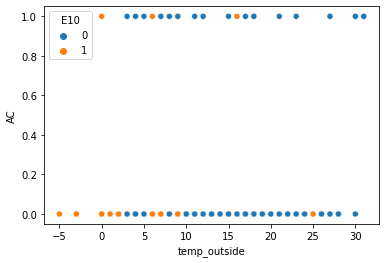

In [137]:
sns.scatterplot(x=data_clean['temp_outside'],y=data_clean['AC'],hue=data_clean['E10'])

In [138]:
data_clean['temp_var']= data_clean['temp_inside']-data_clean['temp_outside']
data_clean.corr()[['E10','SP98','consume']]

,E10,SP98,consume
distance,0.053411,-0.053411,-0.128967
consume,0.015327,-0.015327,1.000000
speed,0.097360,-0.097360,-0.227866
temp_inside,-0.010198,0.010198,-0.160623
temp_outside,-0.148705,0.148705,-0.320811
AC,-0.105285,0.105285,0.096591
rain,-0.060328,0.060328,0.248118
sun,-0.022761,0.022761,-0.170667
E10,1.000000,-1.000000,0.015327
SP98,-1.000000,1.000000,-0.015327


<AxesSubplot:xlabel='temp_var', ylabel='consume'>

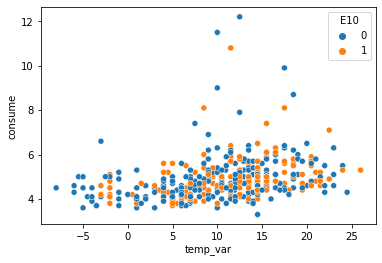

In [139]:
sns.scatterplot(x=data_clean['temp_var'],y=data_clean['consume'],hue=data_clean['E10'])

<AxesSubplot:xlabel='temp_var', ylabel='consume'>

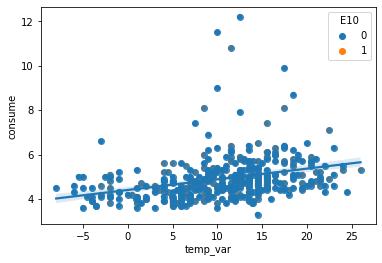

In [140]:
sns.scatterplot(x=data_clean['temp_var'],y=data_clean['consume'],hue=data_clean['E10'])
sns.regplot(x=data_clean['temp_var'],y=data_clean['consume'],data=data_clean)

In [141]:
pd.pivot_table(data_clean, index=['E10','SP98'], values=('consume','distance','speed','temp_var'))

,,consume,distance,speed,temp_var
E10,SP98,,,,
0,1,4.899123,18.639912,40.820175,9.709937
1,0,4.931250,21.096250,43.506250,11.798679


PREDICTING CONSUMPTION  

In [142]:
E10=data_clean[data_clean['E10']==1]

In [143]:
SP98=data_clean[data_clean['E10']==0]

In [144]:
SP98

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98,temp_var
44,5.4,3.3,32,21.5,7,0,0,0,0,1,14.5
45,2.0,9.9,21,21.5,4,0,0,0,0,1,17.5
46,14.2,5.1,32,21.5,7,0,0,0,0,1,14.5
47,16.0,4.9,25,21.5,8,0,0,0,0,1,13.5
48,11.8,4.9,25,21.5,11,0,0,0,0,1,10.5
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0,1,6.5
384,16.1,4.3,38,25.0,31,1,0,0,0,1,-6.0
385,16.0,3.8,45,25.0,19,0,0,0,0,1,6.0
386,15.4,4.6,42,25.0,31,1,0,0,0,1,-6.0


In [145]:
E10

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98,temp_var
0,28.0,5.0,26,21.5,12,0,0,0,1,0,9.5
1,12.0,4.2,30,21.5,13,0,0,0,1,0,8.5
2,11.2,5.5,38,21.5,15,0,0,0,1,0,6.5
3,12.9,3.9,36,21.5,14,0,0,0,1,0,7.5
4,18.5,4.5,46,21.5,15,0,0,0,1,0,6.5
...,...,...,...,...,...,...,...,...,...,...,...
344,16.1,5.1,30,25.0,16,1,1,0,1,0,9.0
345,16.0,4.0,42,22.0,15,0,0,0,1,0,7.0
346,15.4,4.8,40,22.0,18,0,0,0,1,0,4.0
347,17.2,3.9,35,22.0,16,0,0,0,1,0,6.0


In [146]:
rel_vars=['distance','speed','temp_outside']

In [147]:
X1=data_clean[rel_vars]
y1=data_clean['consume']

In [148]:
X_train, X_test, y_train, y_test= train_test_split(X1,y1, test_size=.2)

In [149]:
#pip install catboost

In [150]:
from catboost import Pool, CatBoostRegressor
import catboost as cat

In [151]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=5, od_type="Iter", od_wait=500, verbose = False)


In [152]:
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))

In [153]:
y_pred = cat_fit.predict(X_test)


In [154]:
r2_score(y_test,y_pred)

0.6331341055375632

In [155]:
Xe=E10[rel_vars]
ye=E10['consume']
X_train, X_test, y_train, y_test= train_test_split(Xe,ye, test_size=.2)

In [156]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=5, od_type="Iter", od_wait=500, verbose = False)

In [157]:
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))

In [158]:
y_pred = cat_fit.predict(X_test)

In [159]:
r2_score(y_test,y_pred)

0.46837605093674084

In [160]:
GENERAL_TEST=data_clean.head(5)[['distance','speed','temp_outside']]
GENERAL_TEST

,distance,speed,temp_outside
0,28.0,26,12
1,12.0,30,13
2,11.2,38,15
3,12.9,36,14
4,18.5,46,15


In [161]:
y_pred_GT_E = cat_fit.predict(GENERAL_TEST)

In [162]:
GT_E=pd.DataFrame(y_pred_GT_E)

In [163]:
Xs=SP98[rel_vars]
ys=SP98['consume']
X_train, X_test, y_train, y_test= train_test_split(Xs,ys, test_size=.2)

In [164]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=5, od_type="Iter", od_wait=500, verbose = False)


In [165]:
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))

In [166]:
y_pred = cat_fit.predict(X_test)

In [167]:
r2_score(y_test,y_pred)

0.7439700395933092

In [168]:
y_pred_GT_SP = cat_fit.predict(GENERAL_TEST)

In [169]:
GT_SP=pd.DataFrame(y_pred_GT_SP)

In [170]:
cols=['E10','SP98']
comp=pd.concat((GT_E,GT_SP),axis=1)
comp.columns=cols
comp


,E10,SP98
0,4.929732,4.240224
1,4.699125,4.590109
2,4.813258,4.449149
3,4.499721,4.752881
4,4.228152,4.246134
